In [1]:
import geopandas as gdp
import os 
import matplotlib.pyplot as plt

path_dist = "C:/Users/User/OneDrive - Universidad del Pacífico/1. Documentos/0. Bases de datos/11. Mapas Perú/Límite Distrital"
path_prov= "C:/Users/User/OneDrive - Universidad del Pacífico/1. Documentos/0. Bases de datos/11. Mapas Perú/Límite Provincial"
path_reg= "C:/Users/User/OneDrive - Universidad del Pacífico/1. Documentos/0. Bases de datos/11. Mapas Perú/Límite Departamental"

peru_dist = gdp.read_file(path_dist + "/LIMITE_DISTRITAL_2020_INEI_geogpsperu_juansuyo_931381206.shp")
peru_reg = gdp.read_file(path_reg + "/INEI_LIMITE_DEPARTAMENTAL_GEOGPSPERU_JUANSUYO_931381206.shp")
peru_prov = gdp.read_file(path_prov + "/INEI_LIMITE_PROVINCIAL_196_GEOGPSPERU_JUANSUYO_931381206.shp")


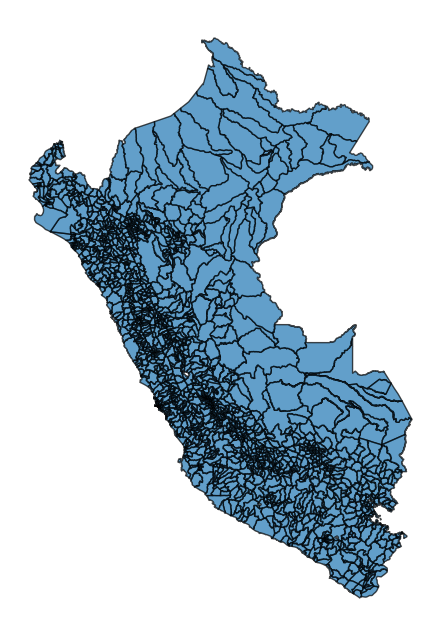

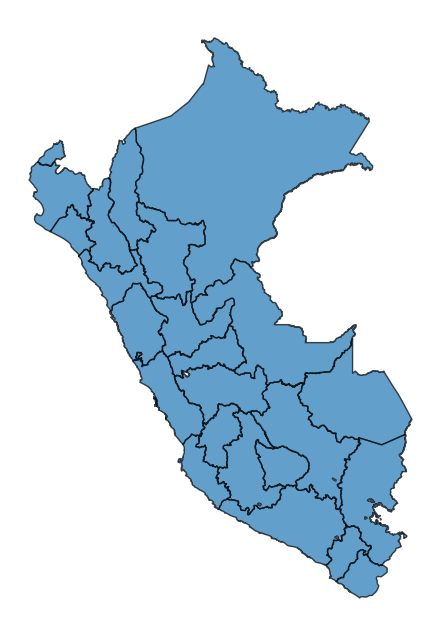

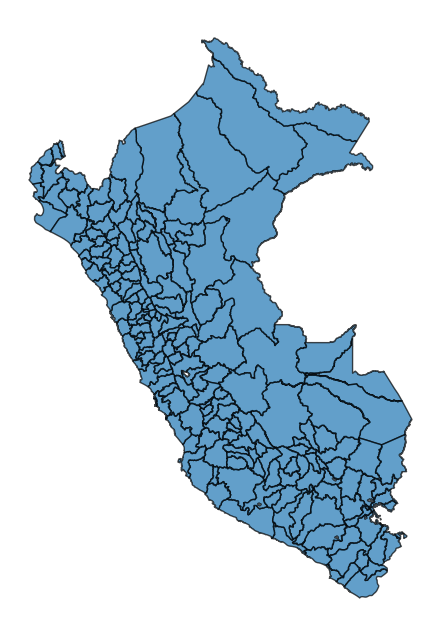

In [25]:
os.chdir(r'C:\Users\User\OneDrive - Universidad del Pacífico\1. Documentos\0. Bases de datos\11. Mapas Perú')

ax = peru_dist.plot(edgecolor='black', linewidth=1, figsize=(10, 8), alpha=0.7)
ax.grid(False)
ax.axis('off')
plt.savefig('peru_dist.png', transparent=True, dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()

ax = peru_reg.plot(edgecolor='black', linewidth=1, figsize=(10, 8), alpha=0.7)
ax.grid(False)
ax.axis('off')
plt.savefig('peru_reg.png', transparent=True, dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()

ax = peru_prov.plot(edgecolor='black', linewidth=1, figsize=(10, 8), alpha=0.7)
ax.grid(False)
ax.axis('off')
plt.savefig('peru_prov.png', transparent=True, dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()


In [15]:
import pandas as pd
dict_data = {'25': 12, '22': 7, '16': 4, '01': 1, '10': 1, '02' : 0, '03' : 0, '04' : 0, '05' : 0, '06' : 0, '07' : 0, '08' : 0, '09' : 0, '11' : 0, '12' : 0, '13' : 0, '14' : 0, '15' : 0, '17' : 0, '18' : 0, '19' : 0, '20' : 0, '21' : 0, '23' : 0, '24' : 0 }
df = pd.DataFrame(list(dict_data.items()), columns=['CCDD', 'numbers'])


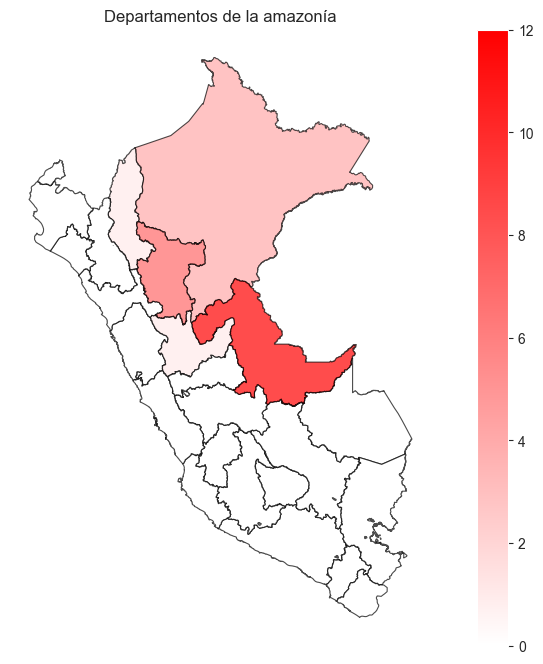

In [32]:
from matplotlib.colors import LinearSegmentedColormap
os.chdir(r'C:\Users\User\OneDrive - Universidad del Pacífico\1. Documentos\0. Bases de datos\11. Mapas Perú')
# Assuming you have two DataFrames peru_reg and df
merged_df = peru_reg.merge(df, on='CCDD', how='outer')

# Define a custom colormap where strong red represents higher values
cmap = LinearSegmentedColormap.from_list('custom_reds', [(1, 1, 1), (1, 0, 0)], N=256)

fig, ax = plt.subplots(1, figsize=(12, 8))
ax.set_title('Departamentos de la amazonía')

merged_df.plot(column='numbers', cmap=cmap, linewidth=0.8, ax=ax, legend=True, edgecolor='black', alpha=0.7)
legend = ax.get_legend()
ax.grid(False)
ax.axis('off')
plt.savefig('amazonia_rosa.png', transparent=True, dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()

In [36]:
import pandas as pd
import os
os.chdir(r'C:\Users\User\OneDrive - Universidad del Pacífico\1. Documentos\0. Bases de datos\11. Mapas Perú')

dist_cajamarca = pd.read_excel("dist_cajamarca.xlsx")

dist_cajamarca["CCDD"] = "06"
dist_cajamarca["CCPP"] = dist_cajamarca['CCPP'].astype(str).str.zfill(2)
dist_cajamarca["CCDI"] = dist_cajamarca['CCDI'].astype(str).str.zfill(2)

prov_cajamarca = dist_cajamarca[dist_cajamarca["UBIGEO"] < 800]
prov_cajamarca = prov_cajamarca.loc[1:,:]
dist_cajamarca = dist_cajamarca[dist_cajamarca["CCPP"]== "01"]
dist_cajamarca = dist_cajamarca.loc[1:,:]

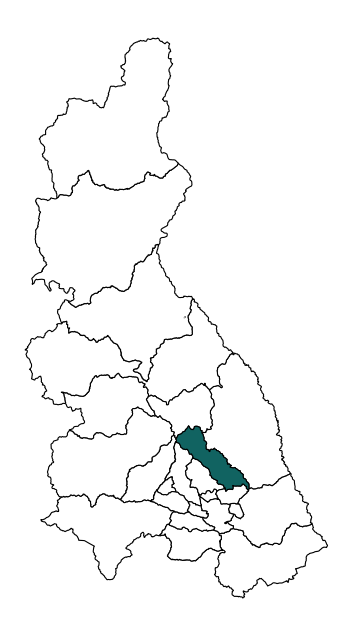

In [48]:
from matplotlib.colors import LinearSegmentedColormap
os.chdir(r'C:\Users\User\OneDrive - Universidad del Pacífico\1. Documentos\0. Bases de datos\11. Mapas Perú')
# Assuming you have two DataFrames peru_reg and df
merged_df = peru_dist.merge(dist_cajamarca, on=["CCDD","CCPP","CCDI"], how='outer')
merged_df2 = peru_prov.merge(prov_cajamarca, on=["CCDD","CCPP"], how='outer')

# Define a custom colormap where strong red represents higher values
cmap = LinearSegmentedColormap.from_list('custom_reds', [(1, 1, 1), (0.06640625, 0.38671875, 0.37890625)], N=256)

fig, ax = plt.subplots(1, figsize=(12, 8))

merged_df2.plot( column = "Seleccionado", cmap=cmap, linewidth=0.8, ax=ax, legend=False, edgecolor='black', alpha=1)  # You can adjust the color and alpha as needed
merged_df.plot(column='Seleccionado', cmap=cmap, linewidth=0.8, ax=ax, legend=False, edgecolor='black', alpha=1)

ax.grid(False)
ax.axis('off')
plt.savefig('cajamarca_overlay.png', transparent=True, dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()

In [8]:
import pandas as pd
import os
from matplotlib.colors import LinearSegmentedColormap

os.chdir(r'C:\Users\User\OneDrive - Universidad del Pacífico\1. Documentos\0. Bases de datos\11. Mapas Perú')

matDist = pd.read_excel("dataMatricula.xlsx", sheet_name="BD")
matDist["UBIGEO"] = matDist['UBIGEO'].astype(str).str.zfill(6)

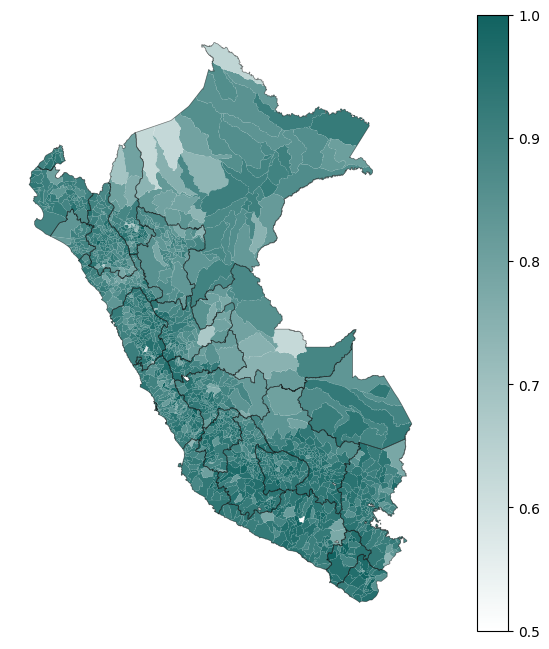

In [31]:

merged_df = peru_dist.merge(matDist, on=["UBIGEO"], how='outer')

# Define a custom colormap where strong red represents higher values
cmap = LinearSegmentedColormap.from_list('custom_reds', [(1,1,1) , (0.06640625, 0.38671875, 0.37890625) ], N=256)

fig, ax = plt.subplots(1, figsize=(12, 8))

merged_df.plot(column='DATA', cmap=cmap, linewidth=0, ax=ax, legend=True, edgecolor='black', alpha=1)
peru_reg.plot(linewidth=0.5, ax=ax, legend=False, edgecolor='black', alpha=0.5, facecolor="none")  # You can adjust the color and alpha as needed

ax.grid(False)
ax.axis('off')
plt.savefig('matriculaDistrital.png', transparent=True, dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()

In [71]:
import pandas as pd
import os
from matplotlib.colors import LinearSegmentedColormap

os.chdir(r'C:\Users\User\OneDrive - Universidad del Pacífico\1. Documentos\0. Bases de datos\11. Mapas Perú')

matDist = pd.read_excel("Data_Nacimientos.xlsx")
matDist["UBIGEO"] = matDist['UBIGEO'].astype(str).str.zfill(6)
num_quantiles = 4

# Use pd.qcut to create quantile groups
quantile_groups = pd.qcut(matDist['DATA'], q=num_quantiles, labels=False)

# Add the quantile group column to the DataFrame
matDist['quantile_group'] = quantile_groups

quantile_values = [matDist['DATA'][quantile_groups == i].values for i in range(num_quantiles)]

legend_labels = [f'Cuartil {i+1}: {min(q):.1%}-{max(q):.1%}' for i, q in enumerate(quantile_values)]


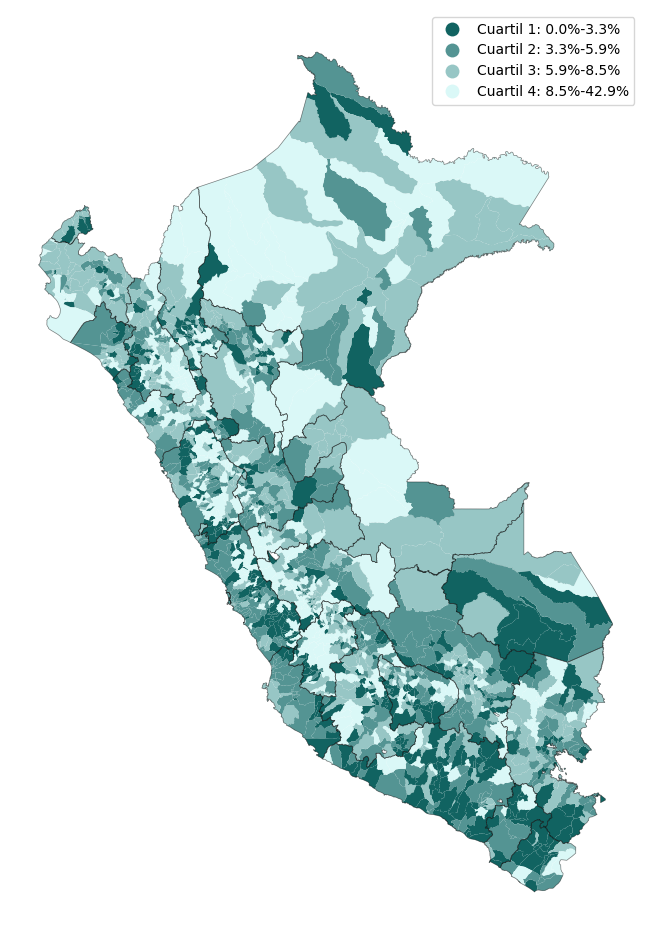

In [73]:

merged_df = peru_dist.merge(matDist, on=["UBIGEO"], how='outer')

# Define a custom colormap where strong red represents higher values
cmap = LinearSegmentedColormap.from_list('custom_reds', [(0.06640625, 0.38671875, 0.37890625) , (0.85546875, 0.97265625, 0.96875) ], N=256)

fig, ax = plt.subplots(1, figsize=(12, 12))

merged_df.plot(column='quantile_group', cmap=cmap, linewidth=0, ax=ax, legend=True, edgecolor='black', alpha=1, categorical=True, legend_kwds={'labels': legend_labels})
peru_reg.plot(linewidth=0.5, ax=ax, legend=False, edgecolor='black', alpha=0.5, facecolor="none")  # You can adjust the color and alpha as needed

ax.grid(False)
ax.axis('off')
plt.savefig('pesoAlNacer.png', transparent=True, dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()